In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
%matplotlib inline

In [84]:
train = pd.read_csv('train.csv')

In [85]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [87]:
import pandas_summary as pds

In [88]:
dfs = pds.DataFrameSummary(train)

In [89]:
dfs.columns_stats

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,891,891,891,891,891,714,891,891,891,891,204,889
uniques,891,2,3,891,2,88,7,7,681,248,147,3
missing,0,0,0,0,0,177,0,0,0,0,687,2
missing_perc,0%,0%,0%,0%,0%,19.87%,0%,0%,0%,0%,77.10%,0.22%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


In [90]:
dfs.corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


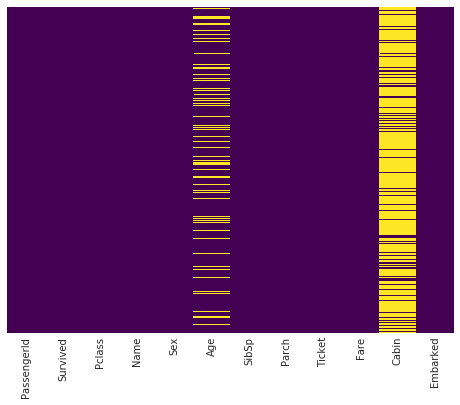

In [91]:
plt.figure(figsize=(8,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

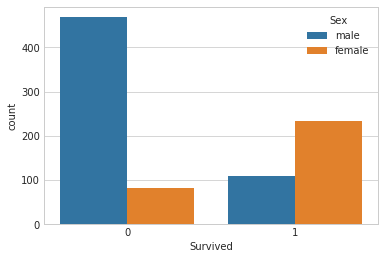

In [92]:
sns.countplot(x = 'Survived',data = train,hue = 'Sex')

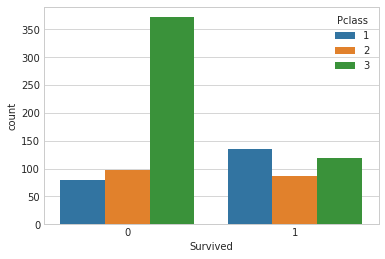

In [93]:
sns.countplot(x='Survived',data=train,hue='Pclass')

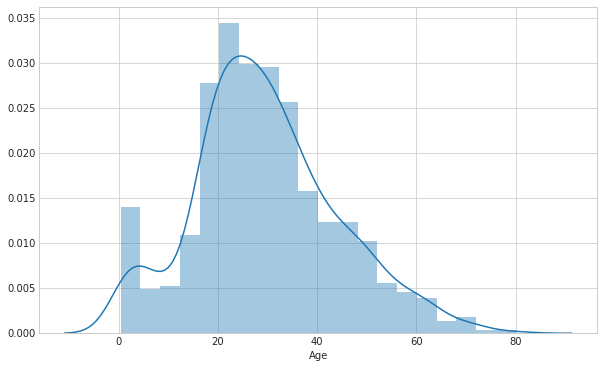

In [94]:
plt.figure(figsize=(10,6))
sns.set_style(style='whitegrid')
sns.distplot(train['Age'].dropna())

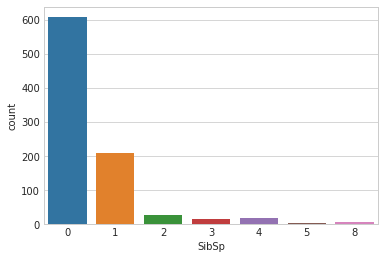

In [95]:
sns.countplot(x = 'SibSp',data = train)

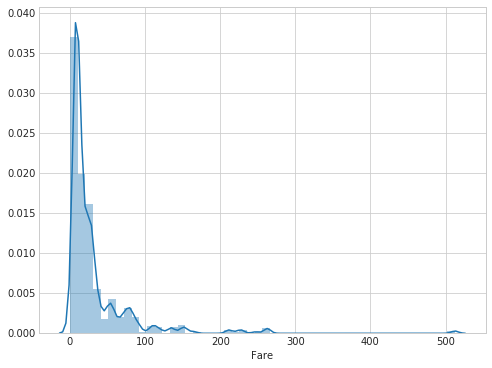

In [96]:
plt.figure(figsize=(8,6))
sns.distplot(train['Fare'])

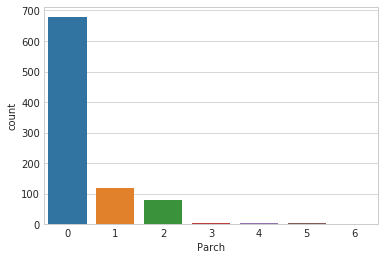

In [97]:
sns.countplot('Parch',data=train)

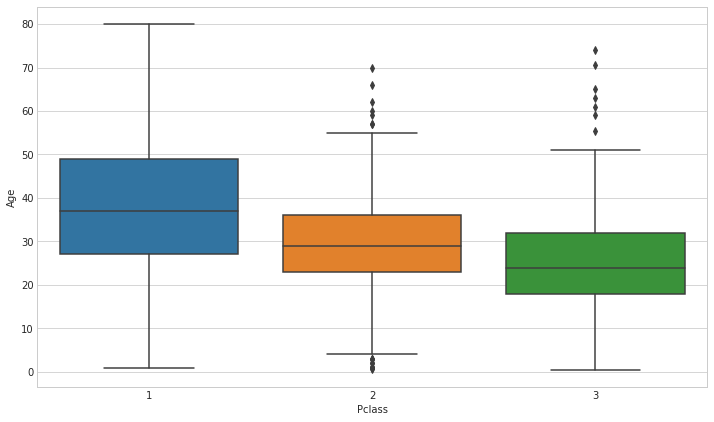

In [98]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [99]:
def impute_age(Column):
    Age = Column[0]
    Pclass = Column[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
        
    else:
        return Age

In [100]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

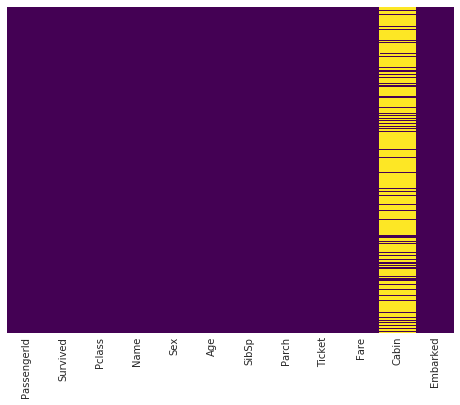

In [101]:
plt.figure(figsize=(8,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [102]:
train['Cabin'][1][0]

'C'

In [103]:
train['Cabin'].fillna(value='None',inplace=True)

In [104]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


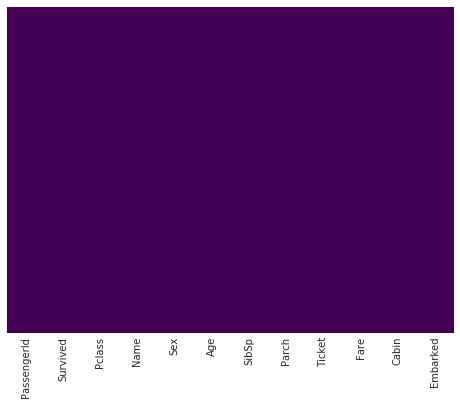

In [105]:
plt.figure(figsize=(8,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [106]:
i=0
x = []
for items in train['Cabin']:
    x.append(train['Cabin'][i][0])
    i+=1

In [107]:
train['Cabin'] = pd.DataFrame(data=x)

In [108]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [109]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,N,Q


In [110]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [111]:
train[train['Embarked'].isnull() == True] #same type of ticket, same fare, hence same place (assumption)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN


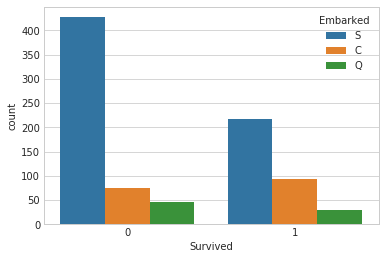

In [112]:
sns.countplot(x='Survived',data=train,hue='Embarked') 

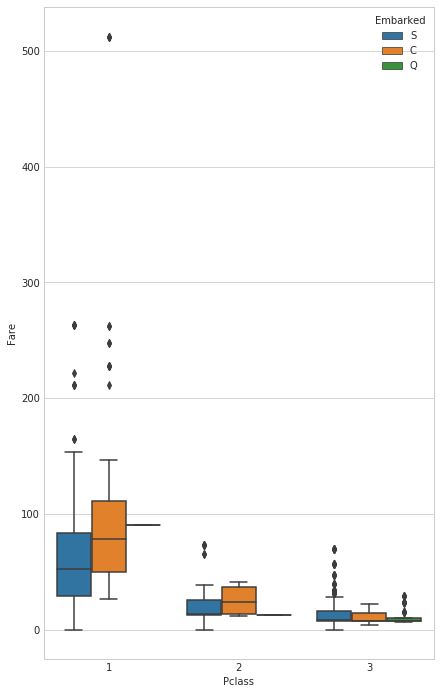

In [113]:
plt.figure(figsize=(7,12))
sns.boxplot(x='Pclass',y='Fare',data=train,hue='Embarked')

In [114]:
train['Embarked'][61] = 'C'

/home/nikhilesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       1
dtype: int64

In [116]:
train['Embarked'][829] = 'C'

/home/nikhilesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [118]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [119]:
train['Name'][0].split(' ')

['Braund,', 'Mr.', 'Owen', 'Harris']

In [120]:
train['Name'][0].split(' ')[1]

'Mr.'

In [121]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [122]:
train['Name'][1].split(' ')[1]

'Mrs.'

In [123]:
i=0
for items in train['Name']:
    print(train['Name'][i].split(' ')[1])
    i+=1

Mr.
Mrs.
Miss.
Mrs.
Mr.
Mr.
Mr.
Master.
Mrs.
Mrs.
Miss.
Miss.
Mr.
Mr.
Miss.
Mrs.
Master.
Mr.
Planke,
Mrs.
Mr.
Mr.
Miss.
Mr.
Miss.
Mrs.
Mr.
Mr.
Miss.
Mr.
Don.
Mrs.
Miss.
Mr.
Mr.
Mr.
Mr.
Mr.
Planke,
Miss.
Mrs.
Mrs.
Mr.
Miss.
Miss.
Mr.
Mr.
Miss.
Mr.
Mrs.
Master.
Mr.
Mrs.
Mrs.
Mr.
Mr.
Miss.
Mr.
Miss.
Master.
Mr.
Miss.
Mr.
Master.
Mr.
Master.
Mrs.
Mr.
Miss.
Mr.
Mr.
Miss.
Mr.
Mr.
Mr.
Mr.
Mr.
Mr.
Master.
Miss.
Mr.
Mr.
Miss.
Mr.
Miss.
Mrs.
Mr.
Mr.
Miss.
Mr.
Mr.
Mr.
Mr.
Mr.
Mr.
Mr.
Mr.
Mr.
Mrs.
Mr.
Miss.
Mr.
Mr.
Mr.
Mr.
Mr.
Miss.
Mr.
Mr.
Miss.
Mr.
Miss.
Mr.
Miss.
Miss.
Mr.
Mr.
Mr.
Mr.
Miss.
Mr.
Mr.
Mr.
Miss.
Mr.
Master.
Mr.
Mr.
Miss.
Mr.
Mr.
Mr.
Mrs.
Mrs.
Mr.
Mr.
Miss.
Mr.
Mr.
Mr.
Mrs.
Miss.
Mrs.
Mr.
Mr.
Mr.
Mr.
Miss.
Mr.
Rev.
Rev.
Mrs.
Mr.
Billiard,
Mr.
Mr.
Miss.
Mr.
Mr.
Master.
Mr.
Mrs.
Mr.
Mr.
Master.
Master.
Mrs.
Mrs.
Mr.
Mr.
der
Master.
Miss.
Mr.
Mr.
Mr.
Master.
Miss.
Mr.
Mr.
Miss.
Mr.
Master.
Master.
Miss.
Mr.
Mrs.
Mr.
Mr.
Mr.
Mrs.
Mr.
Miss.
Master.
Mrs.
Miss.
Mr.
Mr.
Miss.
Miss.
Walle,
M

In [124]:
i=0
x=[]
for items in train['Name']:
    x.append(train['Name'][i].split(' ')[1])
    i+=1

In [125]:
x

['Mr.',
 'Mrs.',
 'Miss.',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Master.',
 'Mrs.',
 'Mrs.',
 'Miss.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mrs.',
 'Master.',
 'Mr.',
 'Planke,',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Miss.',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Don.',
 'Mrs.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Planke,',
 'Miss.',
 'Mrs.',
 'Mrs.',
 'Mr.',
 'Miss.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mrs.',
 'Master.',
 'Mr.',
 'Mrs.',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Miss.',
 'Master.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Master.',
 'Mr.',
 'Master.',
 'Mrs.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Master.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Miss.',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mrs.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Miss.',
 

In [126]:
train['Name'] = pd.DataFrame(data=x,columns=['Title'])

In [127]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr.,male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,Mrs.,female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,Miss.,female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,Mrs.,female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,Mr.,male,35.0,0,0,373450,8.0500,N,S


In [128]:
len(train['Name'].unique())

31

In [129]:
len(train['Ticket'].unique())

681

In [130]:
train.drop(['Ticket'],axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,Mr.,male,22.0,1,0,7.2500,N,S
1,2,1,1,Mrs.,female,38.0,1,0,71.2833,C,C
2,3,1,3,Miss.,female,26.0,0,0,7.9250,N,S
3,4,1,1,Mrs.,female,35.0,1,0,53.1000,C,S
4,5,0,3,Mr.,male,35.0,0,0,8.0500,N,S


In [131]:
train.drop(['Ticket'],axis=1,inplace=True)

In [132]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,Mr.,male,22.0,1,0,7.2500,N,S
1,2,1,1,Mrs.,female,38.0,1,0,71.2833,C,C
2,3,1,3,Miss.,female,26.0,0,0,7.9250,N,S
3,4,1,1,Mrs.,female,35.0,1,0,53.1000,C,S
4,5,0,3,Mr.,male,35.0,0,0,8.0500,N,S


In [133]:
titles = pd.get_dummies(train['Name'],drop_first=True)

In [134]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [135]:
cabin = pd.get_dummies(train['Cabin'],drop_first=True)

In [136]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [137]:
train.drop(['Name','Sex','Cabin','Embarked'],axis=1).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [138]:
train.drop(['Name','Sex','Cabin','Embarked','PassengerId'],axis=1,inplace=True)

In [139]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [140]:
train = pd.concat([train,titles,cabin,sex,embarked],axis=1)

In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 47 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null float64
Capt.           891 non-null uint8
Carlo,          891 non-null uint8
Col.            891 non-null uint8
Cruyssen,       891 non-null uint8
Don.            891 non-null uint8
Dr.             891 non-null uint8
Gordon,         891 non-null uint8
Impe,           891 non-null uint8
Jonkheer.       891 non-null uint8
Major.          891 non-null uint8
Master.         891 non-null uint8
Melkebeke,      891 non-null uint8
Messemaeker,    891 non-null uint8
Miss.           891 non-null uint8
Mlle.           891 non-null uint8
Mme.            891 non-null uint8
Mr.             891 non-null uint8
Mrs.            891 non-null uint8
Ms.             891 non-null uint8
Mulder,         

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1), train['Survived'], test_size=0.30, random_state=101)

In [144]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
knn = KNeighborsClassifier(n_neighbors=1)

In [146]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [147]:
pred = knn.predict(X_test)

In [148]:
from sklearn.metrics import classification_report,confusion_matrix

In [149]:
print(confusion_matrix(y_test,pred))

[[123  31]
 [ 52  62]]


In [150]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.70      0.80      0.75       154
          1       0.67      0.54      0.60       114

avg / total       0.69      0.69      0.68       268



In [151]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

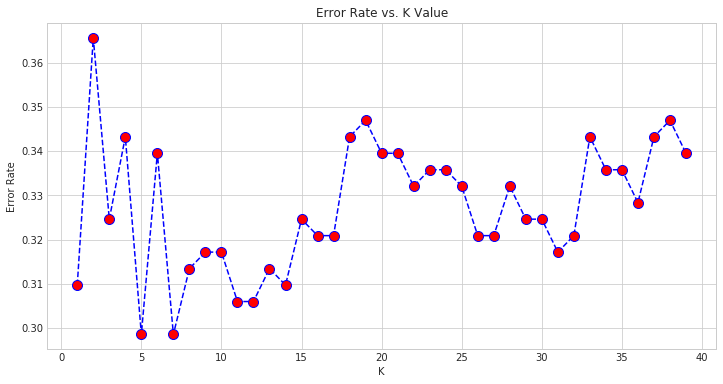

In [152]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [163]:
knn = KNeighborsClassifier(n_neighbors=5)

In [164]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [165]:
prediction = knn.predict(X_test)

In [166]:
print(confusion_matrix(y_test,prediction))

[[126  28]
 [ 52  62]]


In [167]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.71      0.82      0.76       154
          1       0.69      0.54      0.61       114

avg / total       0.70      0.70      0.69       268



In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [170]:
predictions = logmodel.predict(X_test)

In [171]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.88      0.84       154
          1       0.82      0.70      0.75       114

avg / total       0.81      0.81      0.80       268



In [162]:
#try playing with the embarked feature